## Extract Pauses
- V1 on 9/27/2025 8am PT
- V2 on 10/4/2025 11am PT

In [1]:
# Install ffmpeg, pydub, boto3
!pip install ffmpeg-python imageio[ffmpeg]
!pip install pydub
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00


In [2]:
import boto3
from google.colab import userdata
import io
import imageio_ffmpeg
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pydub import AudioSegment
from pydub.silence import detect_silence

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


In [3]:
# S3 base path
# audio_path = "s3://asrelder-data/common_voice/clips/"
audio_path = "s3://asrelder-data/common_voice/23/cv-corpus-23.0-2025-09-05/en/clips/"

In [4]:
# Establish session with credentials
bucket = "asrelder-data"
session = boto3.Session(
    aws_access_key_id=userdata.get("AWS_ACCESS"),
    aws_secret_access_key=userdata.get("AWS_SECRET"),
    region_name="us-east-1"
)
s3 = session.client("s3")

In [5]:
# Make sure that pydub is pointing at the ffmpeg we downloaded
AudioSegment.converter = imageio_ffmpeg.get_ffmpeg_exe()
AudioSegment.ffmpeg = AudioSegment.converter
AudioSegment.ffprobe = AudioSegment.converter

#### Download 'common_voices_23_sample1.csv' from Capstone Drive

In [7]:
# Download common_voices_23_sample1.csv
file_id = "1JEVx9pCO4fKzBO6SVYrR0TI0uEmPJOlN"
download_url = f"https://drive.google.com/uc?id={file_id}"
!gdown {download_url} -O sample.csv

Downloading...
From: https://drive.google.com/uc?id=1JEVx9pCO4fKzBO6SVYrR0TI0uEmPJOlN
To: /content/sample.csv
100% 276k/276k [00:00<00:00, 96.5MB/s]


In [8]:
# Sample DataFrame
sample_df = pd.read_csv("sample.csv")
print(f"sample_df.shape: {sample_df.shape}")
sample_df.head(2)

sample_df.shape: (800, 14)


,Unnamed: 0,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,0,9c2f492df32ffef8d377bf95c5d5bf4e97165f41927e84...,common_voice_en_23836453.mp3,768c97dbbc6f0370d672d9919c2dfb4e8771ad5771eb87...,"She, Decima and Morta together controlled the ...",NaN,2,0,twenties,female_feminine,United States English,NaN,en,NaN
1,1,41655d9d812e0caeff7683981ca3d3288cf2e837dd1490...,common_voice_en_23759784.mp3,733707938769dfec35b5ee7585edaccceb0bb9bb6ad8e9...,Roll control was by differential actuation of ...,NaN,2,0,twenties,male_masculine,United States English,NaN,en,NaN


#### Download 'common_voices_23_full.csv' from Capstone Drive

In [9]:
# Download common_voices_23_full.csv
file_id = "1S-BwO8LKtTWq6t-ccMh-dYDfwVRLTLv5"
download_url = f"https://drive.google.com/uc?id={file_id}"
!gdown {download_url} -O full.csv

Downloading...
From (original): https://drive.google.com/uc?id=1S-BwO8LKtTWq6t-ccMh-dYDfwVRLTLv5
From (redirected): https://drive.google.com/uc?id=1S-BwO8LKtTWq6t-ccMh-dYDfwVRLTLv5&confirm=t&uuid=5113714c-516b-41f0-a576-895b03867607
To: /content/full.csv
100% 387M/387M [00:01<00:00, 235MB/s]


In [10]:
# Full DataFrame
full_df = pd.read_csv("full.csv")
print(f"full_df.shape: {full_df.shape}")
full_df.head(2)

/tmp/ipython-input-3149984049.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv("full.csv")


full_df.shape: (1142930, 14)


,Unnamed: 0,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,0,cff8474bb50a3230043ec7881d0b9534135c6b272d3faa...,common_voice_en_18017109.mp3,259f752d5761f6e1c05b5265dac1ae8937d2b6638030b8...,"If at first you don't succeed, try, try again.",NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
1,1,cff8474bb50a3230043ec7881d0b9534135c6b272d3faa...,common_voice_en_18017111.mp3,2db9a10272221587787ef81f5e2efc996c9a0578c42d08...,Different species have different ways of deali...,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN


In [11]:
# full_df[full_df["path"] == "common_voice_en_25192921.mp3"].loc[:, "client_id"].iloc[0]
# # 04bfef3f0ac57c1482c4624318bcf9d4510519618fdbd4f5bcb45ae4d55c5127c71495d6cd72eda2716e502d75c6393cf60a523eb26078988ee563fca3ed3ff8
# full_df[full_df["path"] == "common_voice_en_25192921.mp3"].loc[:, "sentence_id"].iloc[0]
# # 8d100f7710b4fe1815cca677aadcb9db34fdbd8d11e57bd602b260cbe668cf96
# full_df[full_df["path"] == "common_voice_en_25192921.mp3"].loc[:, "sentence"].iloc[0]
# # The forts north of the wall such as Newstead were abandoned.

In [12]:
# full_df[full_df["sentence"] == "The forts north of the wall such as Newstead were abandoned."]

In [ ]:
# 1138422 <-- df.shape[0]
# 1182481 <-- Dave PC: DATASCI 210\Datasets\Common Voice\cv-corpus-22.0-2025-06-20-en\cv-corpus-22.0-2025-06-20\en\clips

In [13]:
# 1182481 - 1138422

In [14]:
# Test boto3 fetch on one file
# prefix = "common_voice/clips/"
prefix = "common_voice/23/cv-corpus-23.0-2025-09-05/en/clips/"
filename = "common_voice_en_20131778.mp3"
obj = s3.get_object(Bucket=bucket, Key=prefix+filename)
audio_bytes = io.BytesIO(obj["Body"].read())
print(f"Loaded {filename} into memory: {len(audio_bytes.getvalue())} bytes")

# Length of clip in seconds (seek 0 rewind to start)
audio_bytes.seek(0)
clip = AudioSegment.from_file(audio_bytes, format="mp3")
print(f"Duration in seconds: {clip.duration_seconds}")

# Play the audio
audio_bytes.seek(0)
Audio(audio_bytes.read(), rate=16000)

Loaded common_voice_en_20131778.mp3 into memory: 48237 bytes
Duration in seconds: 6.024


In [15]:
def resolve_s3_key(fname: str, bucket: str, prefix: str) -> str | None:
    """
    Given a base filename, check for valid extensions in S3.
    Returns the full key if it exists, otherwise None.
    """
    base, ext = os.path.splitext(fname.strip())

    # If an extension is already provided, try it directly
    if ext:
        key = prefix + fname.strip()
        try:
            s3.head_object(Bucket=bucket, Key=key)
            return key
        except s3.exceptions.ClientError:
            return None

    # Otherwise, try common audio extensions
    for cand_ext in [".mp3", ".wav", ".flac", ".m4a", ".ogg"]:
        key = prefix + base + cand_ext
        try:
            s3.head_object(Bucket=bucket, Key=key)
            return key
        except s3.exceptions.ClientError:
            continue

    return None

In [16]:
def get_longest_silence(fname: str):
    try:
        key = resolve_s3_key(fname, bucket, prefix)
        if key is None:
            print(f"No matching file in S3 for {fname}")
            return None, None
        obj = s3.get_object(Bucket=bucket, Key=key)
        audio_bytes = io.BytesIO(obj["Body"].read())
        clip = AudioSegment.from_file(audio_bytes, format="mp3")
        silences = detect_silence(
            clip,
            min_silence_len=200,
            silence_thresh=clip.dBFS - 16
        )
        if silences:
            silences_sec = [(s/1000, e/1000) for s, e in silences]
            start, end = max(silences_sec, key=lambda x: x[1] - x[0])
            return start, end - start
        else:
            return None, 0.0
    except Exception as e:
        print(f"Error processing {fname}: {e}")
        return None, None

### Extract Pause Lengths for Sample Set

In [17]:
sample_df[["pause_timestamp", "pause_len"]] = sample_df["path"].apply(
    lambda f: pd.Series(get_longest_silence(f))
)

In [18]:
# Summary statistics
print(f"# clips succesfully fetched pause: {sample_df["pause_len"].notna().sum()}")
print(f"# clips unable to fetch pause: {sample_df["pause_len"].isna().sum()}")
print()
print(f"Longest pause: {sample_df["pause_len"].max():.2f}")
print(f"Shortest pause: {sample_df["pause_len"].min():.2f}")
print(f"Median pause: {sample_df["pause_len"].median():.2f}")
print(f"Mean average pause: {sample_df["pause_len"].mean():.2f}")

# clips succesfully fetched pause: 800
# clips unable to fetch pause: 0

Longest pause: 5.53
Shortest pause: 0.00
Median pause: 1.03
Mean average pause: 1.09


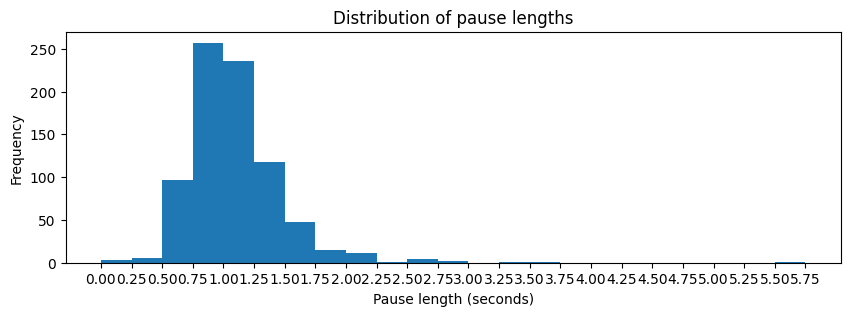

In [19]:
# Graph pause distribution
pause_data = sample_df["pause_len"].dropna()
bins = np.arange(0, pause_data.max() + 0.25, 0.25)

plt.figure(figsize=(10,3))
pause_data.hist(bins=bins, edgecolor=None)
plt.xticks(np.arange(0, pause_data.max() + 0.25, 0.25), rotation=0)
plt.xlabel("Pause length (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of pause lengths")
plt.grid(False)
plt.show()

In [20]:
# Write pause data to csv
non_null_pause_len = sample_df[sample_df["pause_len"] > 0]
non_null_pause_len[[
    "client_id",
    "path",
    "sentence_id",
    "age",
    "gender",
    "accents",
    "pause_timestamp",
    "pause_len",
]].to_csv("common_voice_23_sample_pause_lengths.csv")

### Extract Pause Lengths for Full Set

In [ ]:
full_df[["pause_timestamp", "pause_len"]] = full_df["path"].apply(
    lambda f: pd.Series(get_longest_silence(f))
)

In [ ]:
# Summary statistics
print(f"# clips succesfully fetched pause: {full_df["pause_len"].notna().sum()}")
print(f"# clips unable to fetch pause: {full_df["pause_len"].isna().sum()}")
print()
print(f"Longest pause: {full_df["pause_len"].max():.2f}")
print(f"Shortest pause: {full_df["pause_len"].min():.2f}")
print(f"Median pause: {full_df["pause_len"].median():.2f}")
print(f"Mean average pause: {full_df["pause_len"].mean():.2f}")

In [ ]:
# Graph pause distribution
pause_data_full = full_df["pause_len"].dropna()
bins = np.arange(0, pause_data_full.max() + 0.25, 0.25)

plt.figure(figsize=(10,3))
pause_data_full.hist(bins=bins, edgecolor=None)
plt.xticks(np.arange(0, pause_data_full.max() + 0.25, 0.25), rotation=0)
plt.xlabel("Pause length (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of pause lengths")
plt.grid(False)
plt.show()

In [ ]:
# Write pause data to csv
non_null_pause_len = full_df[full_df["pause_len"] > 0]
non_null_pause_len[[
    "client_id",
    "path",
    "sentence_id",
    "age",
    "gender",
    "accents",
    "pause_timestamp",
    "pause_len",
]].to_csv("common_voice_23_full_pause_lengths.csv")